In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# 1. Construct networks
Now get information of London Tube
 

In [3]:
G=nx.read_graphml('data/london.graphml')


In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 401
Number of edges: 467
Average degree:   2.3292


In [24]:
# check attributes
list(G.nodes(data = True))[0]


('Liverpool Street',
 {'coords': (533125.9616962055, 181621.10750174103),
  'station_name': 'Liverpool Street'})

In [ ]:
# add station name as an attributes of nodes
for node in G.nodes():
    G.nodes[node]['station_name']=node

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Liverpool Street',
 'Stratford',
 {'length': 6698.344174470289, 'line_name': 'TfL Rail', 'flows': 162608})

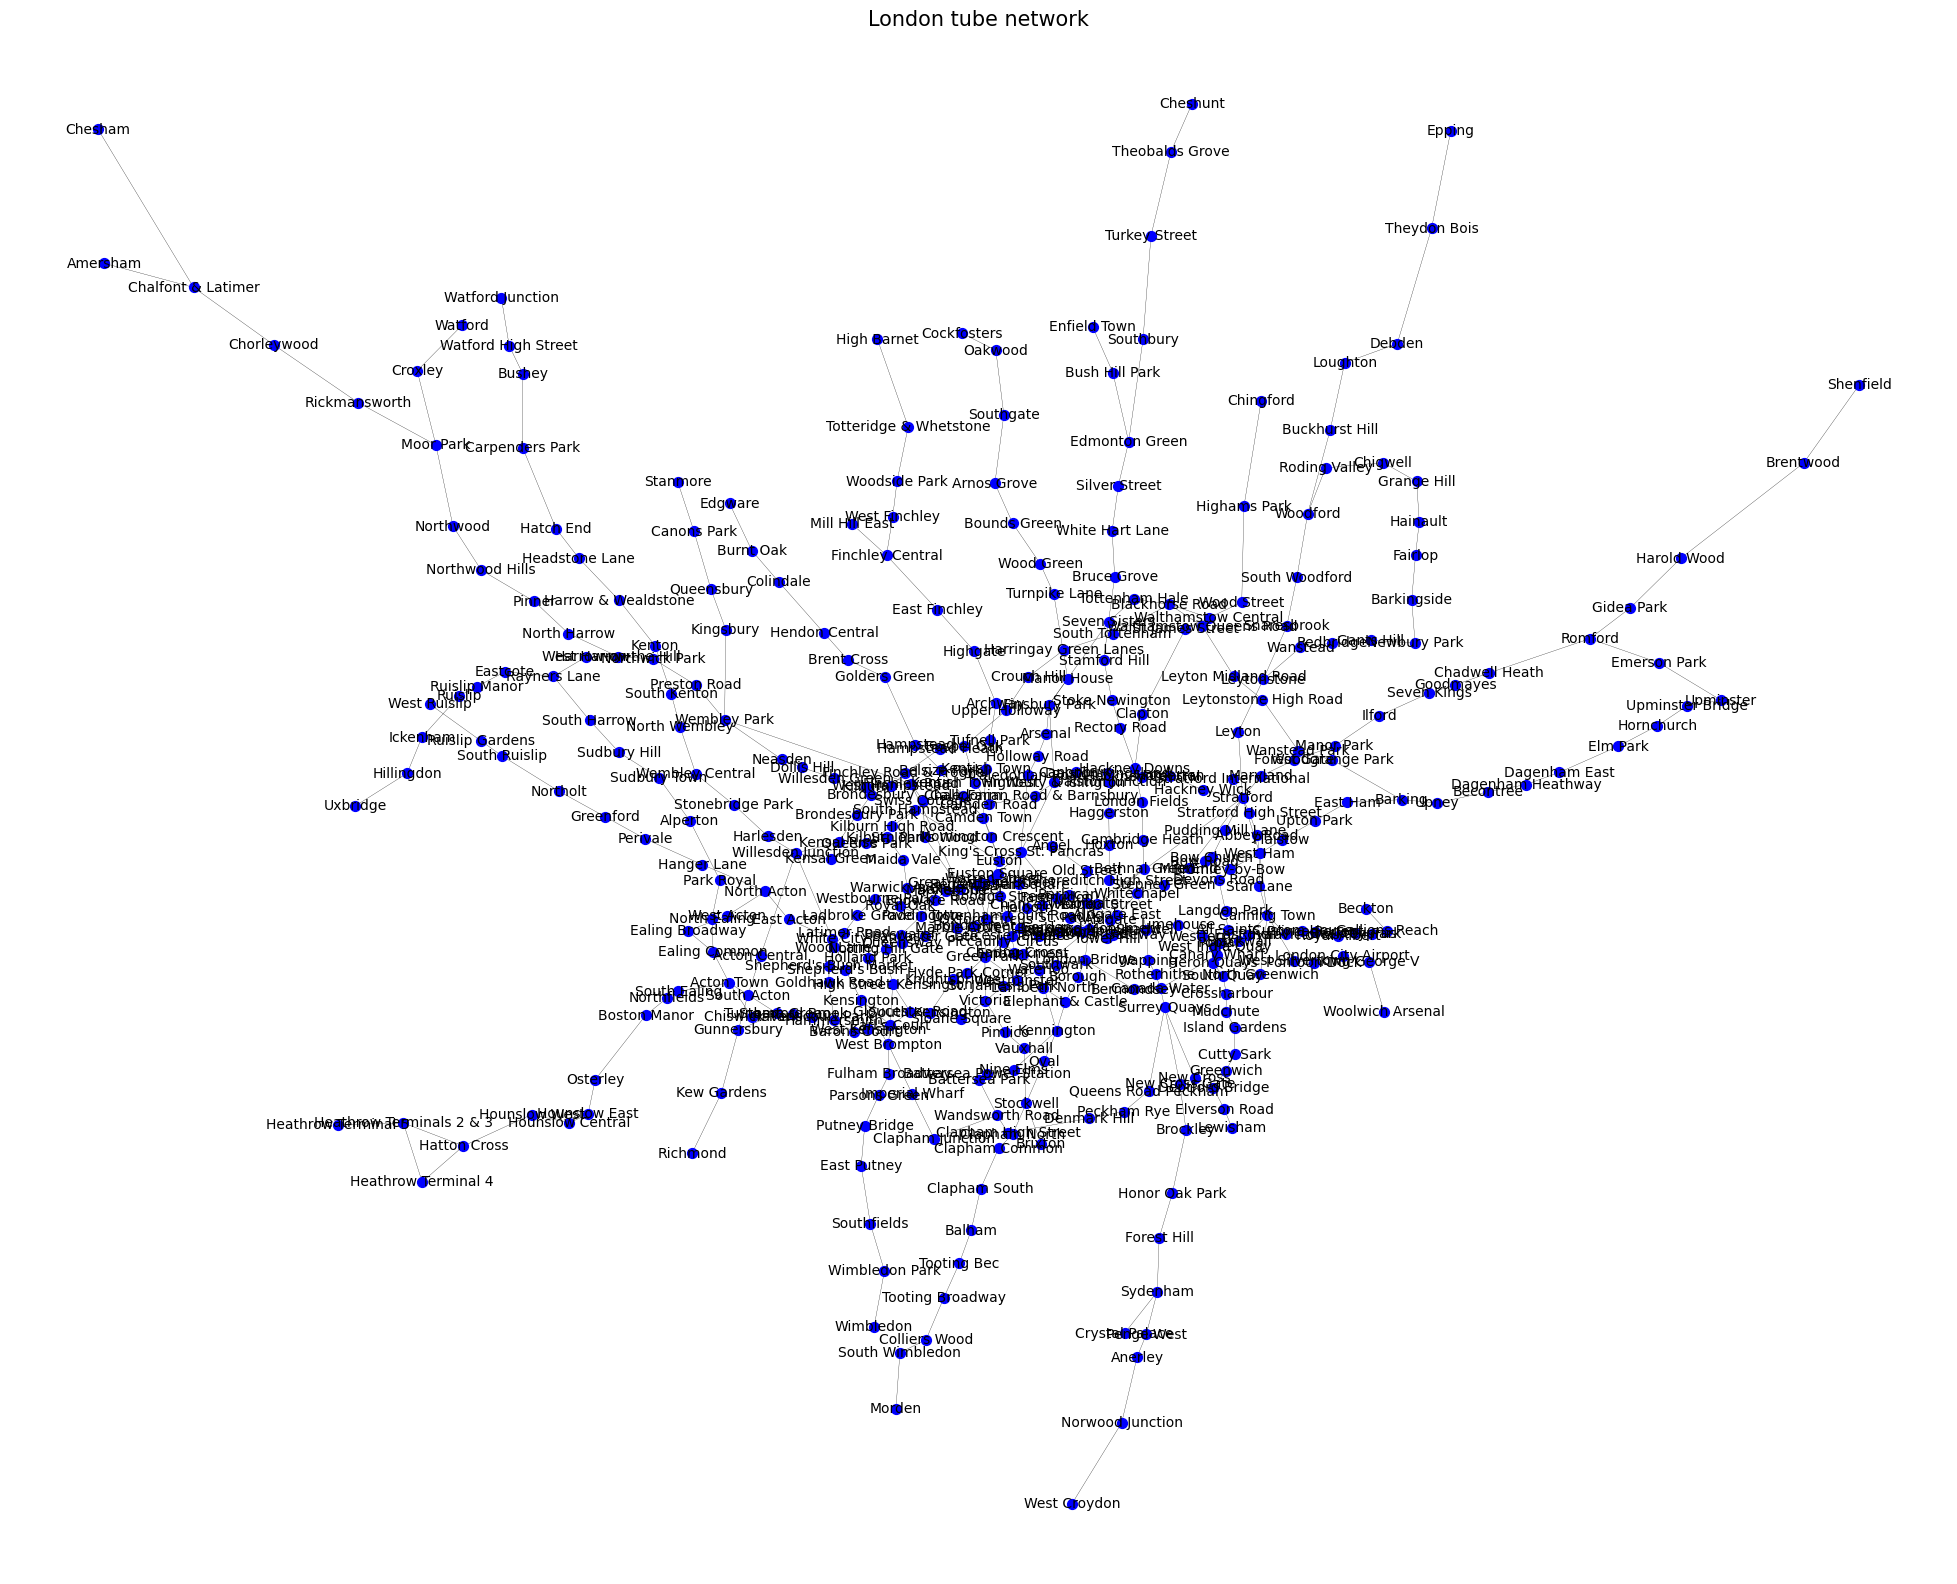

In [25]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')
pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [15]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,line_name,flows
0,Liverpool Street,Stratford,6698.344174,TfL Rail,162608
1,Liverpool Street,Bank and Monument,841.490882,Central,165732
2,Liverpool Street,Bethnal Green,2408.253115,London Overground,32045
3,Liverpool Street,Aldgate East,965.846291,Hammersmith & City,19711
4,Liverpool Street,Moorgate,434.080019,Circle,46979
5,Liverpool Street,Aldgate,722.068754,Circle,10660
6,Stratford,Maryland,951.317256,TfL Rail,34442
7,Stratford,Mile End,2804.953406,Central,6323
8,Stratford,Leyton,2131.339398,Central,56082
9,Stratford,Hackney Wick,1572.918886,London Overground,9891


# 2. Exploring the network

In [26]:
# the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.258259329394

In [27]:
#if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.258259329394, 'line_name': 'Metropolitan', 'flows': 55187})

In [36]:
#if want to know the name of stations which are further away from each other
furthest_stat = [(u,v) for  u,v,d in G.edges(data=True) if d['length'] == max_dist]
furthest_stat

[('Wembley Park', 'Finchley Road')]

In [40]:
# find out which stations Baker Street is connected to 
Baker_Street = [(u,v) for  u,v,d in G.edges(data=True) if "Baker" in u or "Baker" in v]
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [42]:
#to know the edges connecting Baker Street station:

Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in u or "Baker" in v]


In [43]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78580.60076776212

# Investigate resilience of London tube network


## 3. Centrality measures
Degree Centrality on nodes:

In [44]:
#  Calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')


In [45]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
Baker Street,Baker Street,0.0175
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Liverpool Street,Liverpool Street,0.0150
Earl's Court,Earl's Court,0.0150
West Ham,West Ham,0.0150
Oxford Circus,Oxford Circus,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150
